# COVID Data Visualization for 5 regions

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from custuntions import phase_mask, line_plot, scatter_plot

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
xls = pd.ExcelFile('14_Cities_weather_cases.xlsx')
df_abha = pd.read_excel(xls, 'abha')
df_najran = pd.read_excel(xls, 'najran')
df_sharoura = pd.read_excel(xls, 'sharoura')
df_qurayat = pd.read_excel(xls, 'qurayat')
df_tabuk = pd.read_excel(xls, 'tabuk')
df_hail = pd.read_excel(xls, 'hail')
df_jed = pd.read_excel(xls, 'JED')
df_mak = pd.read_excel(xls, 'MAK')
df_taif = pd.read_excel(xls, 'TAIF')
df_madina = pd.read_excel(xls, 'MAD')
df_riyadh = pd.read_excel(xls, 'RUH')
df_dam = pd.read_excel(xls, 'DAM')
df_hofuf = pd.read_excel(xls, 'HOFUF') 
df_jubail = pd.read_excel(xls, 'JUBAIL')
df_dam.rename({"datae":"date"}, axis=1, inplace=True)

In [3]:
dfs_southern = [df_abha, df_najran, df_sharoura]

In [4]:
dfs_northern = [df_qurayat, df_tabuk, df_hail]

In [5]:
dfs_western = [df_jed, df_mak, df_taif, df_madina]

In [6]:
dfs_eastern = [df_dam, df_hofuf, df_jubail]

In [7]:
df_list = [dfs_southern, dfs_northern, dfs_western, dfs_eastern]

In [8]:
for dfs in df_list:
    for df in dfs:
        df.drop(["LAT", "LON", "YEAR", "MO", "DY"], axis=1, inplace=True)
        try:
            df.index = df["date"]
            df.drop(["date"], axis=1, inplace=True)
        except KeyError:
            df.index = df["DATE"]
            df.drop(["DATE"], axis=1, inplace=True)
        df.index.names = ['DATE']
        df.drop(df.tail(2).index,inplace=True)
        

In [9]:
df_southern_mean = pd.concat(dfs_southern).groupby("DATE").mean()
df_northern_mean = pd.concat(dfs_northern).groupby("DATE").mean()
df_eastern_mean = pd.concat(dfs_eastern).groupby("DATE").mean()
df_western_mean = pd.concat(dfs_western).groupby("DATE").mean()

In [10]:
columns = {'PRECTOT': 'Precipitation (mm day-1)',
           'RH2M':'Relative Humidity at 2 Meters (%)',
           'T2MDEW': 'Dew/Frost Point at 2 Meters (C)',
           'T2M_MAX': 'Maximum Temperature at 2 Meters (C)',
           'T2M_MIN' :'Minimum Temperature at 2 Meters (C)',
           'T2M': 'Temperature at 2 Meters (C)',
           'WS50M_RANGE': 'Wind Speed Range at 50 Meters (m/s)',
           'WS10M_RANGE': 'Wind Speed Range at 10 Meters (m/s)'
}

## Southern Region

In [11]:
df_southern_mean.rename(columns=columns, inplace=True)

In [12]:
df_southern_mean

Precipitation (mm day-1)  Relative Humidity at 2 Meters (%)  \
DATE                                                                      
2020-03-01                  0.000000                          38.636667   
2020-03-02                  0.000000                          35.163333   
2020-03-03                  0.000000                          30.206667   
2020-03-04                  0.000000                          36.876667   
2020-03-05                  0.000000                          33.593333   
...                              ...                                ...   
2021-03-12                  0.000000                          24.186667   
2021-03-13                  0.000000                          27.263333   
2021-03-14                  0.000000                          27.413333   
2021-03-15                  0.000000                          27.923333   
2021-03-16                  0.003333                          27.040000   

            Dew/Frost Point at 2 Meters (C)  \
DATE                                          
2020-03-01                         7.126667   
2020-03-02                         6.280000   
2020-03-03                         2.373333   
2020-03-04                         5.383333   
2020-03-05                         4.060000   
...                                     ...   
2021-03-12                         0.953333   
2021-03-13                         3.660000   
2021-03-14                         2.933333   
2021-03-15                         2.783333   
2021-03-16                         2.390000   

            Maximum Temperature at 2 Meters (C)  \
DATE                                              
2020-03-01                            31.506667   
2020-03-02                            31.566667   
2020-03-03                            29.333333   
2020-03-04                            29.650000   
2020-03-05                            30.426667   
...                                         ...   
2021-03-12                            33.090000   
2021-03-13                            33.220000   
2021-03-14                            31.960000   
2021-03-15                            32.450000   
2021-03-16                            33.116667   

            Minimum Temperature at 2 Meters (C)  Temperature at 2 Meters (C)  \
DATE                                                                           
2020-03-01                            15.863333                    23.140000   
2020-03-02                            16.793333                    23.490000   
2020-03-03                            14.976667                    21.573333   
2020-03-04                            15.130000                    21.760000   
2020-03-05                            15.440000                    22.180000   
...                                         ...                          ...   
2021-03-12                            16.646667                    24.250000   
2021-03-13                            16.706667                    24.356667   
2021-03-14                            16.720000                    23.593333   
2021-03-15                            15.663333                    23.603333   
2021-03-16                            16.653333                    24.083333   

            Wind Speed Range at 50 Meters (m/s)  \
DATE                                              
2020-03-01                             5.673333   
2020-03-02                             6.000000   
2020-03-03                             5.736667   
2020-03-04                             5.126667   
2020-03-05                             5.356667   
...                                         ...   
2021-03-12                             6.056667   
2021-03-13                             6.526667   
2021-03-14                             6.993333   
2021-03-15                             5.476667   
2021-03-16                             5.510000   

            Wind Speed Range at 10 Meters (m/s)  cases 

In [13]:
# phase one and phase 2 seperation here
phase1_southern_mean, phase2_southern_mean = phase_mask(df_southern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [14]:
# dropping columns here
phase1_southern_mean = phase1_southern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_southern_mean = phase2_southern_mean.drop(["recoveries", "mortalities"], axis=1)

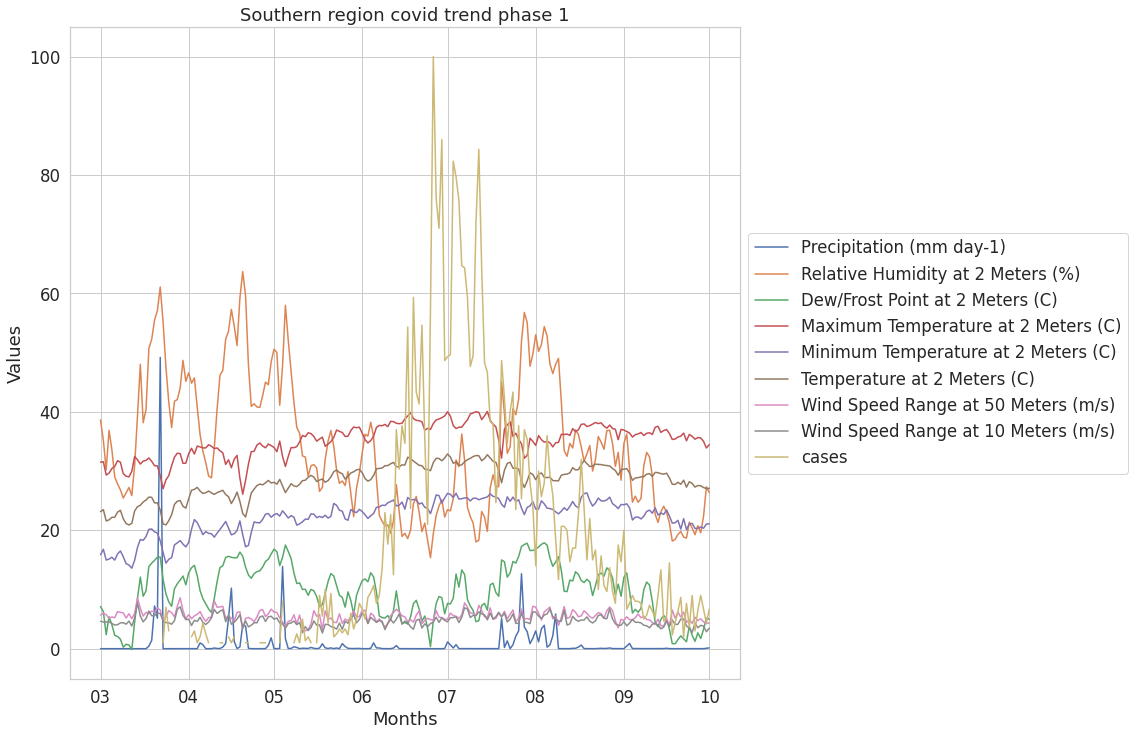

In [15]:
fig, ax = line_plot(phase1_southern_mean, "Southern region covid trend phase 1")

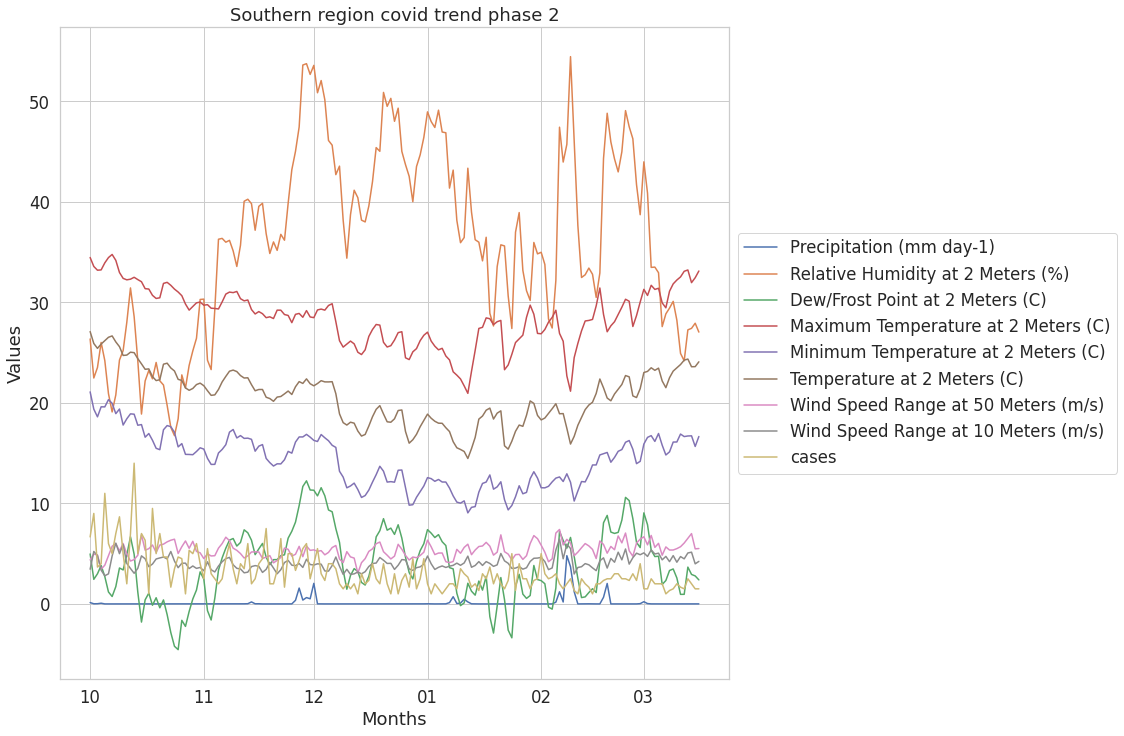

In [16]:
fig, ax = line_plot(phase2_southern_mean, "Southern region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Dew/Frost Point at 2 Meters (C)'>

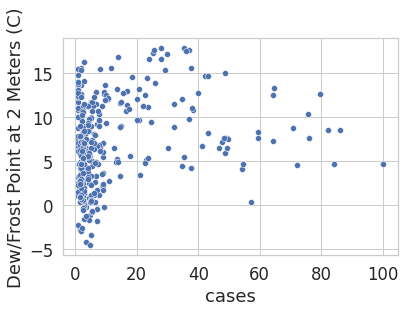

In [17]:
scatter_plot(df_southern_mean, "cases", columns["T2MDEW"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

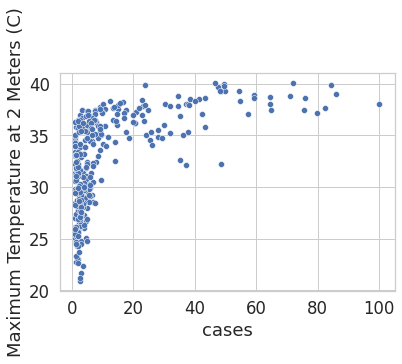

In [18]:
scatter_plot(df_southern_mean, "cases", columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

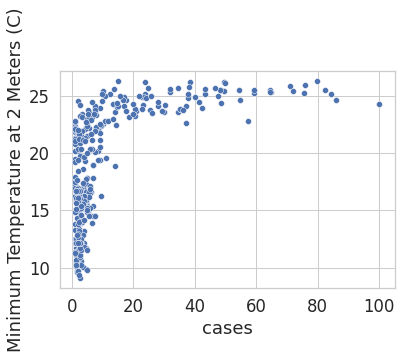

In [19]:
scatter_plot(df_southern_mean, "cases", columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Temperature at 2 Meters (C)'>

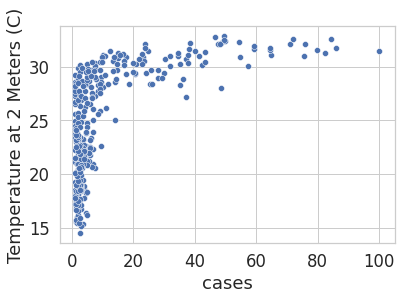

In [20]:
scatter_plot(df_southern_mean, "cases", columns["T2M"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

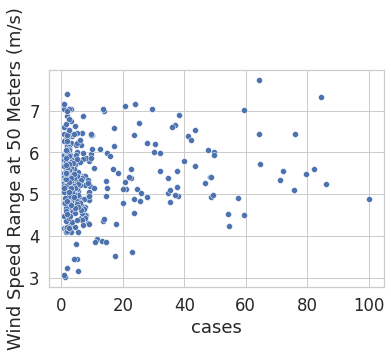

In [21]:
scatter_plot(df_southern_mean, "cases", columns["WS50M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

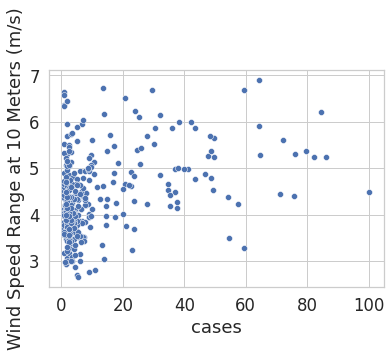

In [22]:
scatter_plot(df_southern_mean, "cases", columns["WS10M_RANGE"])

## Nothern Region

In [23]:
df_northern_mean.rename(columns=columns, inplace=True)

In [24]:
df_northern_mean

Precipitation (mm day-1)  Relative Humidity at 2 Meters (%)  \
DATE                                                                      
2020-03-01                  0.996667                          47.793333   
2020-03-02                  0.000000                          44.780000   
2020-03-03                  0.000000                          32.536667   
2020-03-04                  0.000000                          25.736667   
2020-03-05                  0.000000                          24.950000   
...                              ...                                ...   
2021-03-12                  0.173333                          41.373333   
2021-03-13                  0.000000                          38.273333   
2021-03-14                  0.000000                          26.536667   
2021-03-15                  0.020000                          27.953333   
2021-03-16                  0.000000                          34.833333   

            Dew/Frost Point at 2 Meters (C)  \
DATE                                          
2020-03-01                         0.030000   
2020-03-02                        -0.900000   
2020-03-03                        -3.930000   
2020-03-04                        -5.603333   
2020-03-05                        -4.100000   
...                                     ...   
2021-03-12                         1.603333   
2021-03-13                        -0.813333   
2021-03-14                        -2.706667   
2021-03-15                         0.413333   
2021-03-16                         4.226667   

            Maximum Temperature at 2 Meters (C)  \
DATE                                              
2020-03-01                            19.106667   
2020-03-02                            20.953333   
2020-03-03                            23.533333   
2020-03-04                            26.060000   
2020-03-05                            28.013333   
...                                         ...   
2021-03-12                            21.393333   
2021-03-13                            22.793333   
2021-03-14                            27.750000   
2021-03-15                            30.176667   
2021-03-16                            29.460000   

            Minimum Temperature at 2 Meters (C)  Temperature at 2 Meters (C)  \
DATE                                                                           
2020-03-01                             5.440000                    11.323333   
2020-03-02                             3.463333                    11.380000   
2020-03-03                             4.993333                    13.350000   
2020-03-04                             5.406667                    14.890000   
2020-03-05                             7.496667                    16.866667   
...                                         ...                          ...   
2021-03-12                             8.023333                    15.196667   
2021-03-13                             4.993333                    13.323333   
2021-03-14                             7.223333                    17.166667   
2021-03-15                            11.323333                    20.066667   
2021-03-16                            14.153333                    20.656667   

            Wind Speed Range at 50 Meters (m/s)  \
DATE                                              
2020-03-01                             6.623333   
2020-03-02                             4.783333   
2020-03-03                             6.306667   
2020-03-04                             6.143333   
2020-03-05                             6.410000   
...                                         ...   
2021-03-12                             9.783333   
2021-03-13                             6.616667   
2021-03-14                             5.590000   
2021-03-15                             5.226667   
2021-03-16                             7.023333   

            Wind Speed Range at 10 Meters (m/s)     cas

In [25]:
# phase one and phase 2 seperation here
phase1_northern_mean, phase2_northern_mean = phase_mask(df_northern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [26]:
# dropping columns here
phase1_northern_mean = phase1_northern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_northern_mean = phase2_northern_mean.drop(["recoveries", "mortalities"], axis=1)

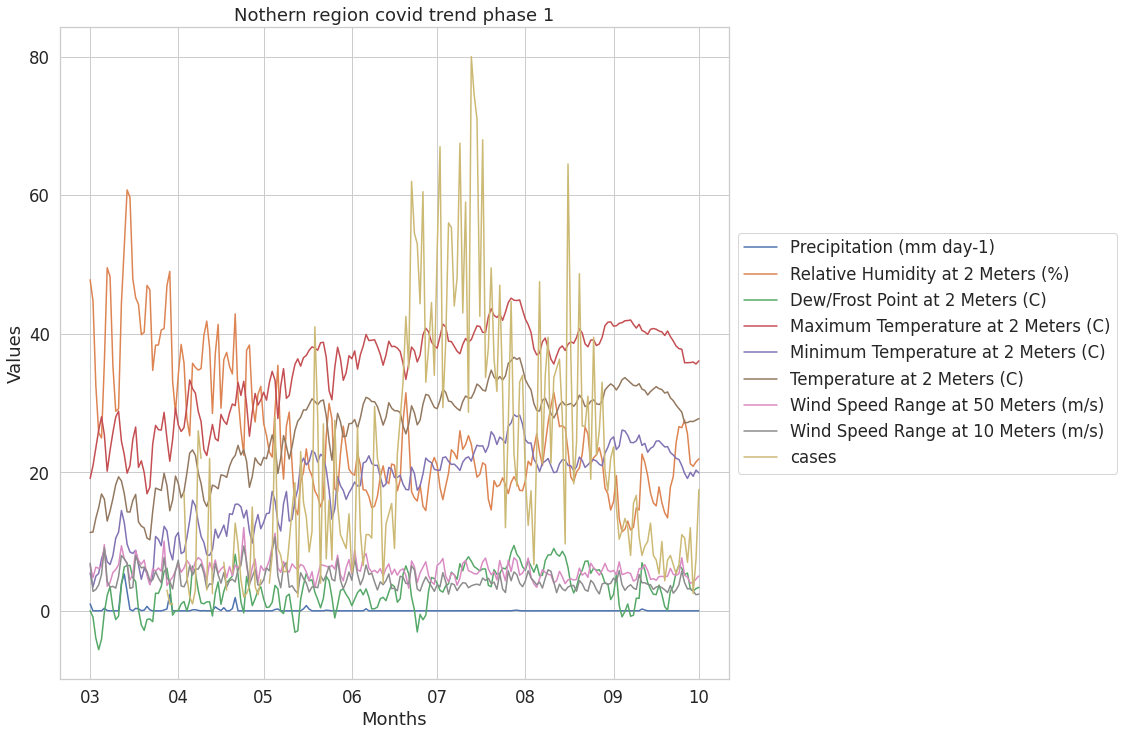

In [27]:
fig, ax = line_plot(phase1_northern_mean, "Nothern region covid trend phase 1")

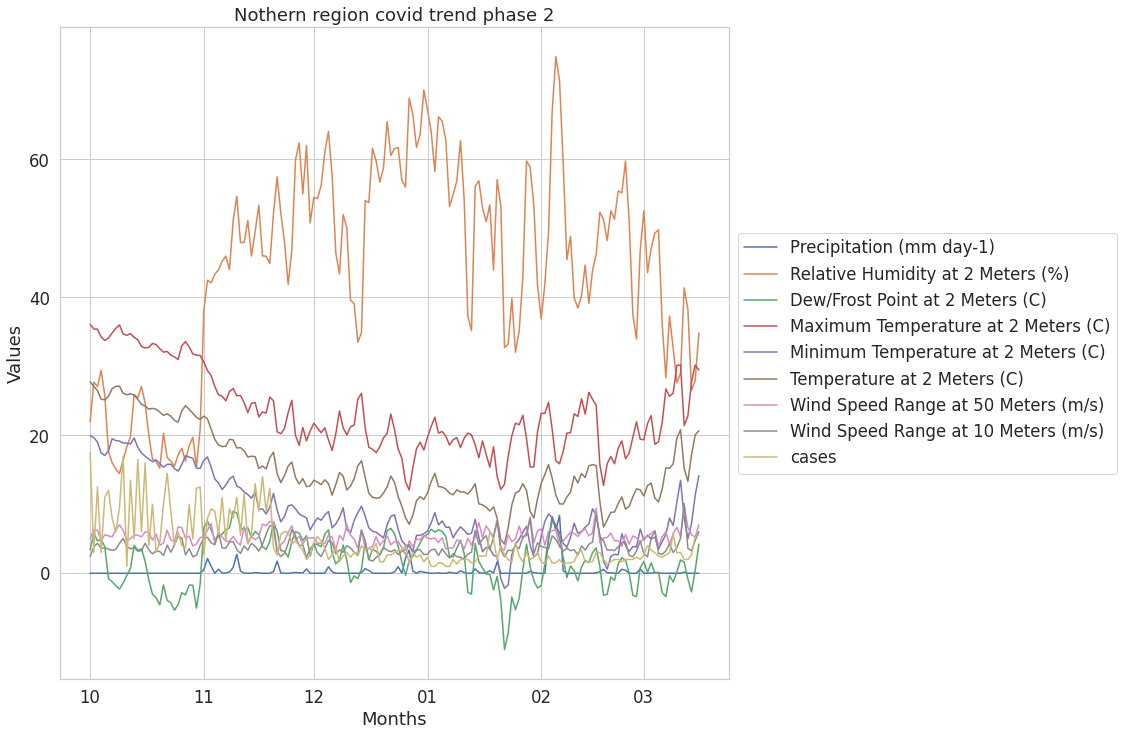

In [28]:
fig, ax = line_plot(phase2_northern_mean, "Nothern region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Dew/Frost Point at 2 Meters (C)'>

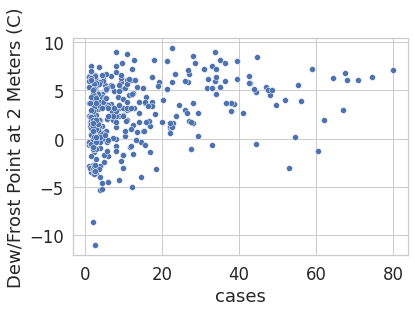

In [29]:
scatter_plot(df_northern_mean, "cases", columns["T2MDEW"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

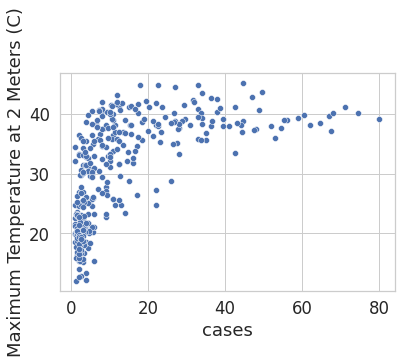

In [30]:
scatter_plot(df_northern_mean, "cases", columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

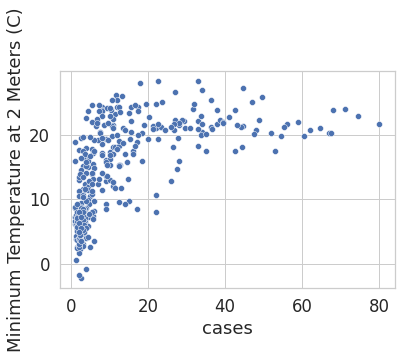

In [31]:
scatter_plot(df_northern_mean, "cases", columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Temperature at 2 Meters (C)'>

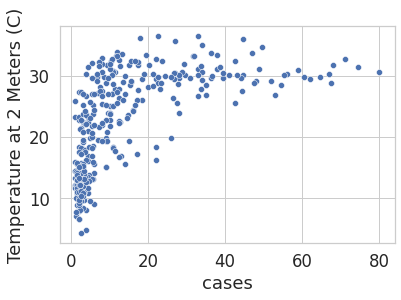

In [32]:
scatter_plot(df_northern_mean, "cases", columns["T2M"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

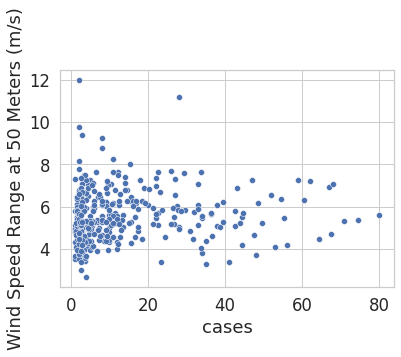

In [33]:
scatter_plot(df_northern_mean, "cases", columns["WS50M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

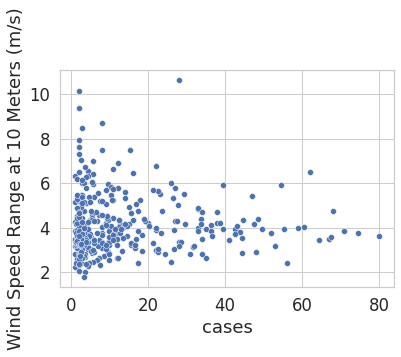

In [34]:
scatter_plot(df_northern_mean, "cases", columns["WS10M_RANGE"])

## Eastern Region

In [35]:
df_eastern_mean.rename(columns=columns, inplace=True)

In [36]:
df_eastern_mean

Precipitation (mm day-1)  Relative Humidity at 2 Meters (%)  \
DATE                                                                      
2020-03-01                  0.000000                          44.843333   
2020-03-02                  0.000000                          51.856667   
2020-03-03                  0.000000                          53.073333   
2020-03-04                  0.000000                          46.830000   
2020-03-05                  0.000000                          50.343333   
...                              ...                                ...   
2021-03-12                  0.000000                          28.360000   
2021-03-13                  0.000000                          42.430000   
2021-03-14                  0.000000                          41.643333   
2021-03-15                  0.000000                          41.743333   
2021-03-16                  0.003333                          43.936667   

            Dew/Frost Point at 2 Meters (C)  \
DATE                                          
2020-03-01                         7.910000   
2020-03-02                         9.016667   
2020-03-03                         8.066667   
2020-03-04                         5.783333   
2020-03-05                         7.423333   
...                                     ...   
2021-03-12                         5.676667   
2021-03-13                         7.376667   
2021-03-14                         4.900000   
2021-03-15                         6.186667   
2021-03-16                         9.056667   

            Maximum Temperature at 2 Meters (C)  \
DATE                                              
2020-03-01                            28.073333   
2020-03-02                            23.643333   
2020-03-03                            22.813333   
2020-03-04                            23.126667   
2020-03-05                            24.450000   
...                                         ...   
2021-03-12                            34.500000   
2021-03-13                            25.196667   
2021-03-14                            23.976667   
2021-03-15                            25.786667   
2021-03-16                            30.336667   

            Minimum Temperature at 2 Meters (C)  Temperature at 2 Meters (C)  \
DATE                                                                           
2020-03-01                            14.950000                    21.043333   
2020-03-02                            15.083333                    19.393333   
2020-03-03                            13.953333                    17.816667   
2020-03-04                            12.943333                    17.660000   
2020-03-05                            13.233333                    18.283333   
...                                         ...                          ...   
2021-03-12                            19.503333                    26.440000   
2021-03-13                            16.233333                    20.930000   
2021-03-14                            14.083333                    18.543333   
2021-03-15                            15.150000                    20.026667   
2021-03-16                            16.003333                    22.716667   

            Wind Speed Range at 50 Meters (m/s)  \
DATE                                              
2020-03-01                             5.293333   
2020-03-02                             7.180000   
2020-03-03                             4.503333   
2020-03-04                             4.233333   
2020-03-05                             5.063333   
...                                         ...   
2021-03-12                             8.330000   
2021-03-13                             7.383333   
2021-03-14                             5.173333   
2021-03-15                             3.143333   
2021-03-16                             5.243333   

            Wind Speed Range at 10 Meters (m/s)      ca

In [37]:
# phase one and phase 2 seperation here
phase1_eastern_mean, phase2_eastern_mean = phase_mask(df_eastern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [38]:
# dropping columns here
phase1_eastern_mean = phase1_eastern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_eastern_mean = phase2_eastern_mean.drop(["recoveries", "mortalities"], axis=1)

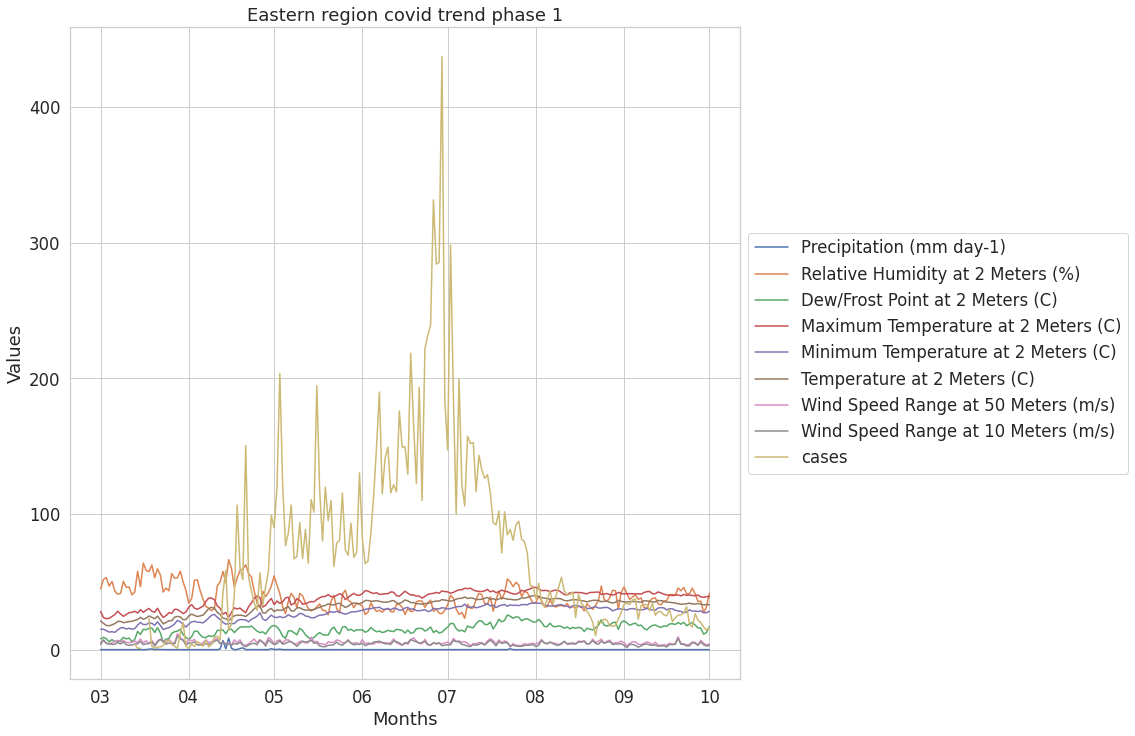

In [39]:
fig, ax = line_plot(phase1_eastern_mean, "Eastern region covid trend phase 1")

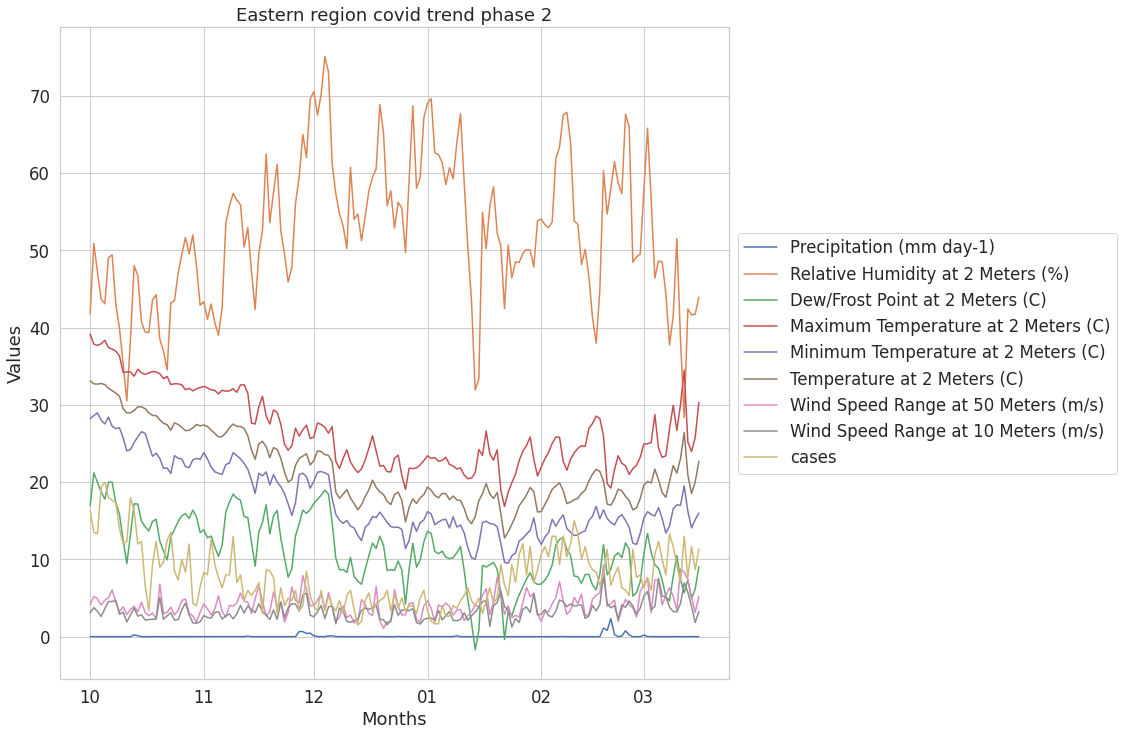

In [40]:
fig, ax = line_plot(phase2_eastern_mean, "Eastern region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Dew/Frost Point at 2 Meters (C)'>

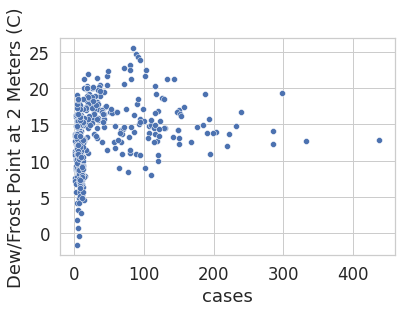

In [41]:
scatter_plot(df_eastern_mean, "cases", columns["T2MDEW"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

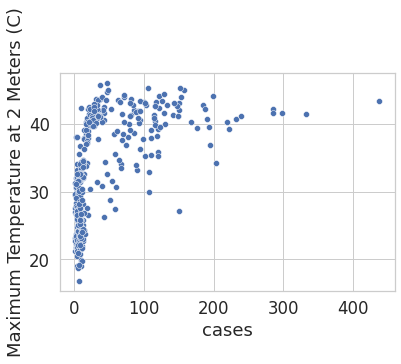

In [42]:
scatter_plot(df_eastern_mean, "cases", columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

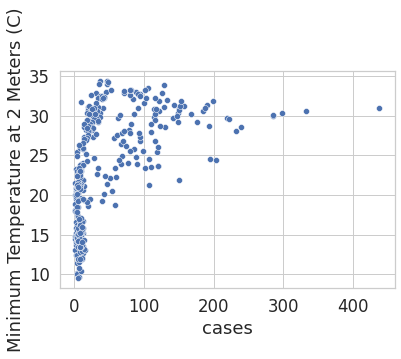

In [43]:
scatter_plot(df_eastern_mean, "cases", columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Temperature at 2 Meters (C)'>

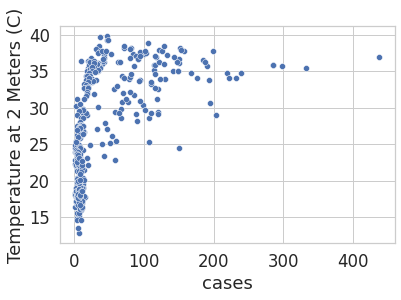

In [44]:
scatter_plot(df_eastern_mean, "cases", columns["T2M"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

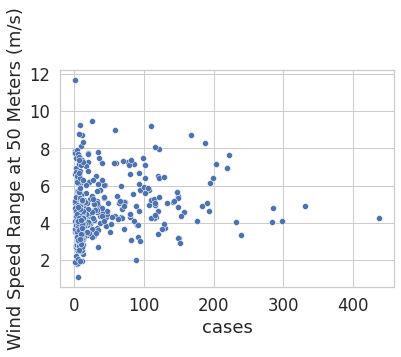

In [45]:
scatter_plot(df_eastern_mean, "cases", columns["WS50M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

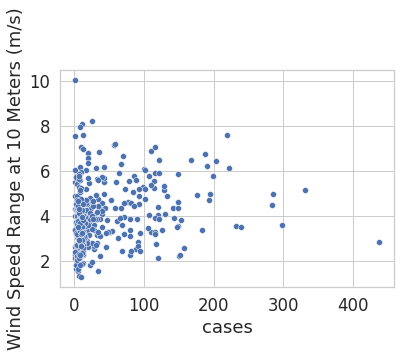

In [46]:
scatter_plot(df_eastern_mean, "cases", columns["WS10M_RANGE"])

## Western Region

In [47]:
df_western_mean.rename(columns=columns, inplace=True)

In [48]:
df_western_mean

Precipitation (mm day-1)  Relative Humidity at 2 Meters (%)  \
DATE                                                                      
2020-03-01                    0.0000                            35.7650   
2020-03-02                    0.0000                            24.2500   
2020-03-03                    0.0000                            29.4025   
2020-03-04                    0.0000                            47.7250   
2020-03-05                    0.0000                            51.1300   
...                              ...                                ...   
2021-03-12                    0.0000                            35.7875   
2021-03-13                    0.0000                            35.3800   
2021-03-14                    0.0000                            37.5925   
2021-03-15                    0.0025                            42.7350   
2021-03-16                    0.0050                            39.9700   

            Dew/Frost Point at 2 Meters (C)  \
DATE                                          
2020-03-01                           5.6450   
2020-03-02                           0.0100   
2020-03-03                           3.8975   
2020-03-04                          12.0250   
2020-03-05                          13.5925   
...                                     ...   
2021-03-12                          10.2400   
2021-03-13                           8.7300   
2021-03-14                          10.3950   
2021-03-15                          12.5725   
2021-03-16                          11.4850   

            Maximum Temperature at 2 Meters (C)  \
DATE                                              
2020-03-01                              30.0725   
2020-03-02                              32.1800   
2020-03-03                              32.0275   
2020-03-04                              31.4300   
2020-03-05                              31.7750   
...                                         ...   
2021-03-12                              34.5125   
2021-03-13                              33.8600   
2021-03-14                              34.1100   
2021-03-15                              34.2375   
2021-03-16                              34.3950   

            Minimum Temperature at 2 Meters (C)  Temperature at 2 Meters (C)  \
DATE                                                                           
2020-03-01                              15.6925                      21.9325   
2020-03-02                              14.6575                      22.2950   
2020-03-03                              16.3525                      23.5675   
2020-03-04                              18.8125                      24.2825   
2020-03-05                              19.1425                      24.5725   
...                                         ...                          ...   
2021-03-12                              21.3100                      26.9800   
2021-03-13                              18.9450                      25.7400   
2021-03-14                              20.1550                      26.2950   
2021-03-15                              20.2450                      26.4525   
2021-03-16                              20.0625                      26.4050   

            Wind Speed Range at 50 Meters (m/s)  \
DATE                                              
2020-03-01                               4.4950   
2020-03-02                               5.6675   
2020-03-03                               5.8875   
2020-03-04                               5.3875   
2020-03-05                               3.8525   
...                                         ...   
2021-03-12                               5.2725   
2021-03-13                               5.4375   
2021-03-14                               6.3125   
2021-03-15                               7.0550   
2021-03-16                               7.5775   

            Wind Speed Range at 10 Meters (m/s)  cases 

In [49]:
# phase one and phase 2 seperation here
phase1_western_mean, phase2_western_mean = phase_mask(df_western_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [50]:
# dropping columns here
phase1_western_mean = phase1_western_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_western_mean = phase2_western_mean.drop(["recoveries", "mortalities"], axis=1)

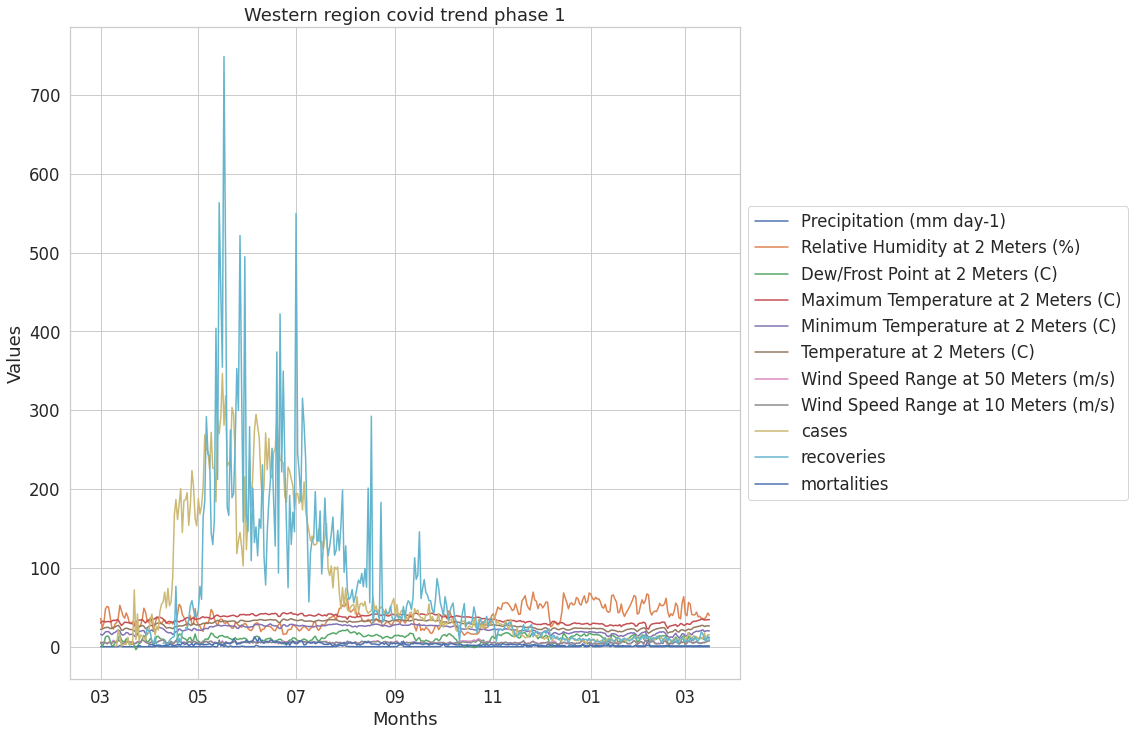

In [51]:
fig, ax = line_plot(df_western_mean, "Western region covid trend phase 1")

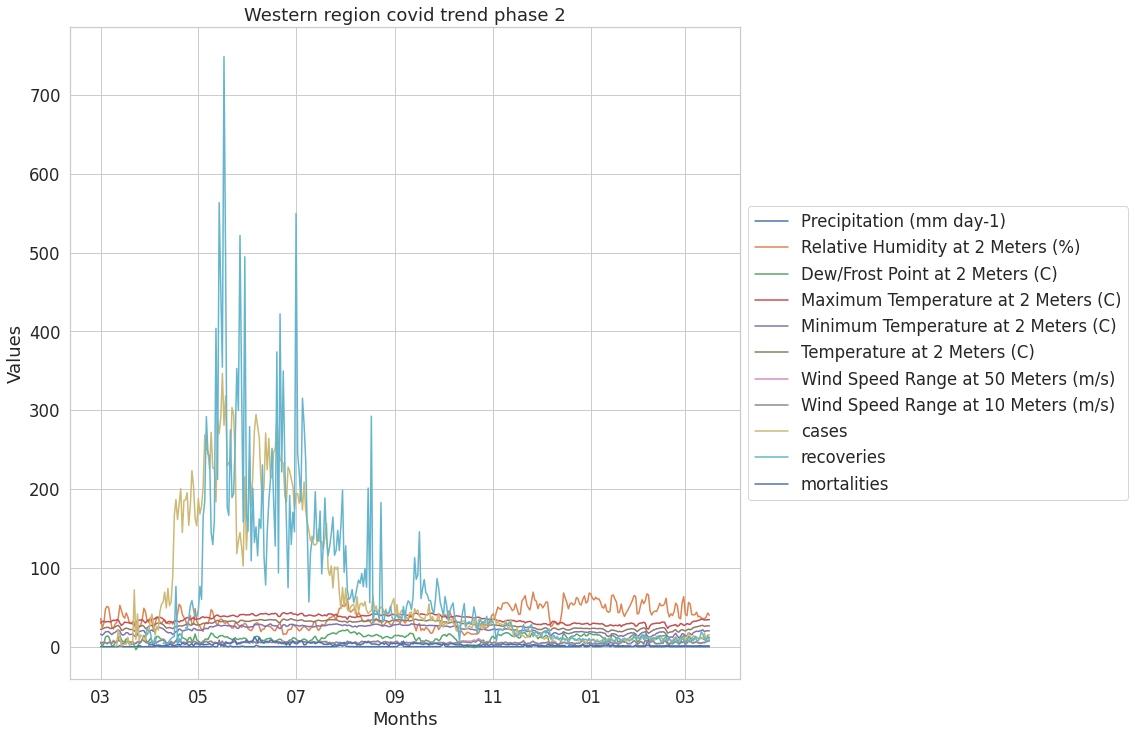

In [52]:
fig, ax = line_plot(df_western_mean, "Western region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Relative Humidity at 2 Meters (%)'>

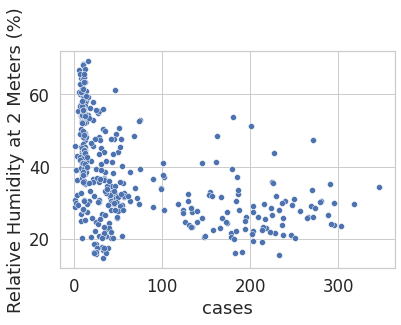

In [53]:
scatter_plot(df_western_mean, "cases", columns["RH2M"]) 

<AxesSubplot:xlabel='cases', ylabel='Dew/Frost Point at 2 Meters (C)'>

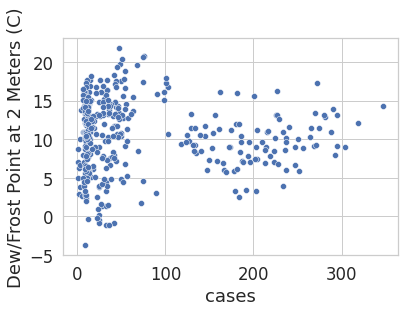

In [54]:
scatter_plot(df_western_mean, "cases", columns["T2MDEW"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

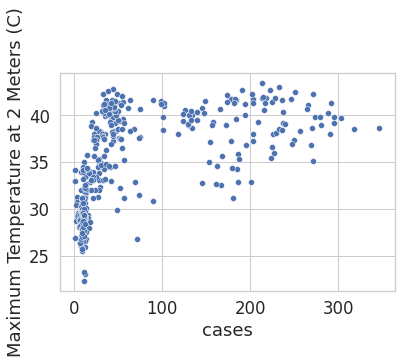

In [55]:
scatter_plot(df_western_mean, "cases", columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

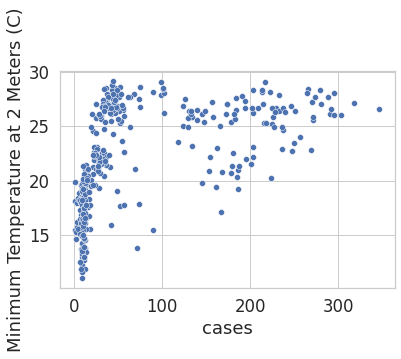

In [56]:
scatter_plot(df_western_mean, "cases", columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Temperature at 2 Meters (C)'>

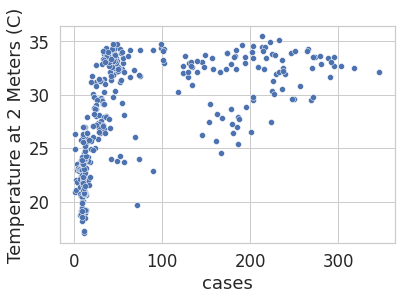

In [57]:
scatter_plot(df_western_mean, "cases", columns["T2M"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

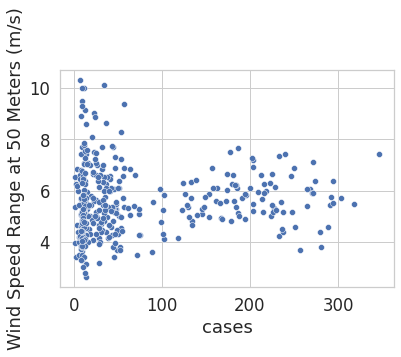

In [58]:
scatter_plot(df_western_mean, "cases", columns["WS50M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

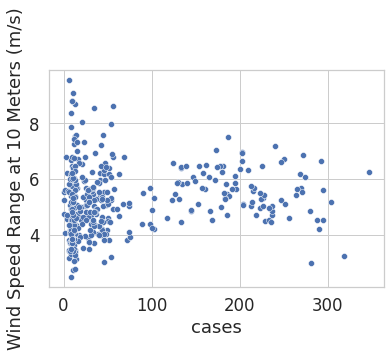

In [59]:
scatter_plot(df_western_mean, "cases", columns["WS10M_RANGE"])

## Riyadh Region

In [60]:
riyadh_columns = {'RH2M':'Relative Humidity at 2 Meters (%)',
                  'T2M_RANGE':"Temperature Range at 2 Meters (C)",
                  'T2M_MAX': 'Maximum Temperature at 2 Meters (C)',
                  'T2M_MIN' :'Minimum Temperature at 2 Meters (C)',
                  'WS50M': 'Wind Speed Range at 50 Meters (m/s)',
                  'WS10M': 'Wind Speed Range at 10 Meters (m/s)'
}

In [61]:
# cleaning up the data
df_riyadh.drop(["LAT", "LON", "YEAR", "MO", "DY"], axis=1, inplace=True)
df_riyadh.index = df_riyadh["DATE"]
df_riyadh.drop(["DATE", "Unnamed: 16"], axis=1, inplace=True)
df_riyadh.drop(df_riyadh.tail(2).index,inplace=True)

In [62]:
# renaming columns
df_riyadh.rename(columns=riyadh_columns, inplace=True)

In [63]:
df_riyadh

PRECTOT  Relative Humidity at 2 Meters (%)  \
DATE                                                     
2020-03-01      0.0                              19.84   
2020-03-02      0.0                              25.41   
2020-03-03      0.0                              21.90   
2020-03-04      0.0                              21.29   
2020-03-05      0.0                              20.65   
...             ...                                ...   
2021-03-12      0.0                              22.78   
2021-03-13      0.0                              33.72   
2021-03-14      0.0                              31.64   
2021-03-15      0.0                              25.36   
2021-03-16      0.0                              23.64   

            Temperature Range at 2 Meters (C)  \
DATE                                            
2020-03-01                              16.67   
2020-03-02                              14.27   
2020-03-03                              17.26   
2020-03-04                              17.02   
2020-03-05                              17.57   
...                                       ...   
2021-03-12                              17.59   
2021-03-13                              13.86   
2021-03-14                              17.25   
2021-03-15                              18.56   
2021-03-16                              18.59   

            Maximum Temperature at 2 Meters (C)  \
DATE                                              
2020-03-01                                32.32   
2020-03-02                                24.93   
2020-03-03                                24.38   
2020-03-04                                26.40   
2020-03-05                                28.20   
...                                         ...   
2021-03-12                                34.90   
2021-03-13                                25.49   
2021-03-14                                26.79   
2021-03-15                                30.25   
2021-03-16                                33.30   

            Minimum Temperature at 2 Meters (C)  \
DATE                                              
2020-03-01                                15.65   
2020-03-02                                10.67   
2020-03-03                                 7.12   
2020-03-04                                 9.39   
2020-03-05                                10.63   
...                                         ...   
2021-03-12                                17.31   
2021-03-13                                11.64   
2021-03-14                                 9.54   
2021-03-15                                11.69   
2021-03-16                                14.70   

            Wind Speed Range at 50 Meters (m/s)  \
DATE                                              
2020-03-01                                 8.14   
2020-03-02                                 7.05   
2020-03-03                                 4.41   
2020-03-04                                 3.84   
2020-03-05                                 3.44   
...                                         ...   
2021-03-12                                11.88   
2021-03-13                                 5.79   
2021-03-14                                 3.72   
2021-03-15                                 7.09   
2021-03-16                                 8.33   

            Wind Speed Range at 10 Meters (m/s)  cases  recoveries  \
DATE                                                                 
2020-03-01                                 5.28    NaN         NaN   
2020-03-02                                 5.09    NaN         NaN   
2020-03-03                                 2.92    NaN         NaN   
2020-03-04                                 2.69    NaN         NaN   
2020-03-05                                 2.25    NaN         NaN   
...                                         ...    ...         ...   
2021-03-12                                 8.12  119.0        77.0 

In [64]:
# phase one and phase 2 seperation here
phase1_riyadh, phase2_riyadh = phase_mask(df_riyadh, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [65]:
# dropping columns here
phase1_riyadh = phase1_riyadh.drop(["recoveries", "mortalities"], axis=1)
phase2_riyadh = phase2_riyadh.drop(["recoveries", "mortalities"], axis=1)

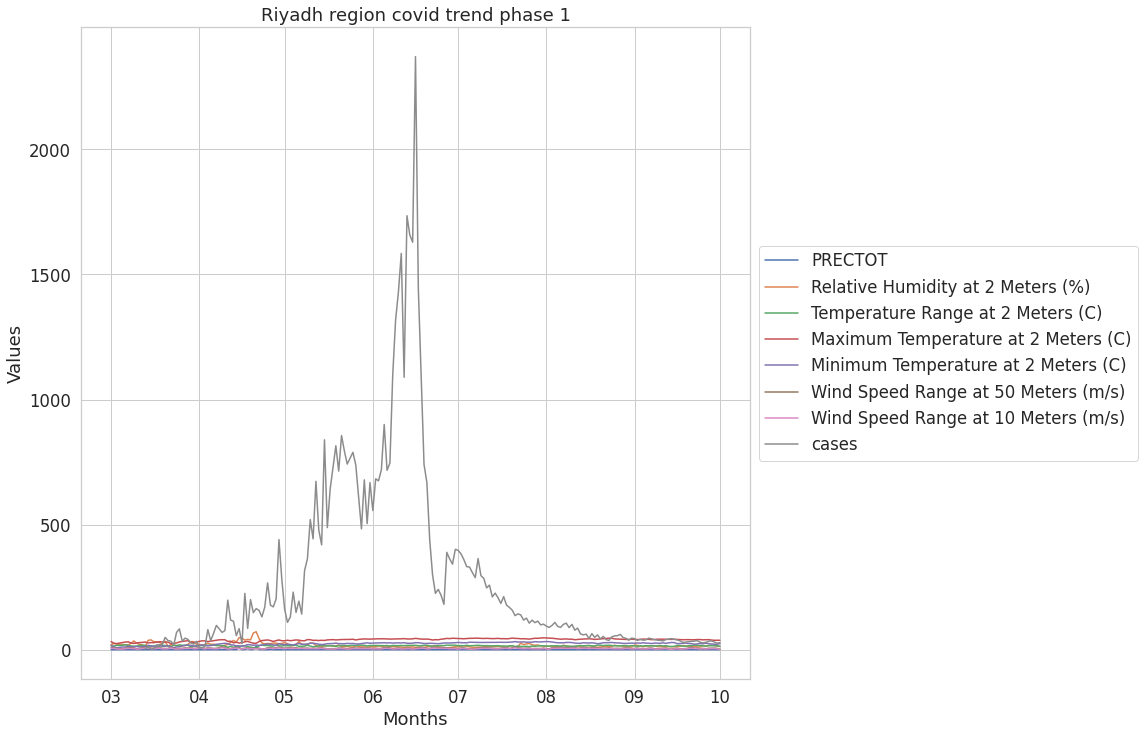

In [66]:
fig, ax = line_plot(phase1_riyadh, "Riyadh region covid trend phase 1")

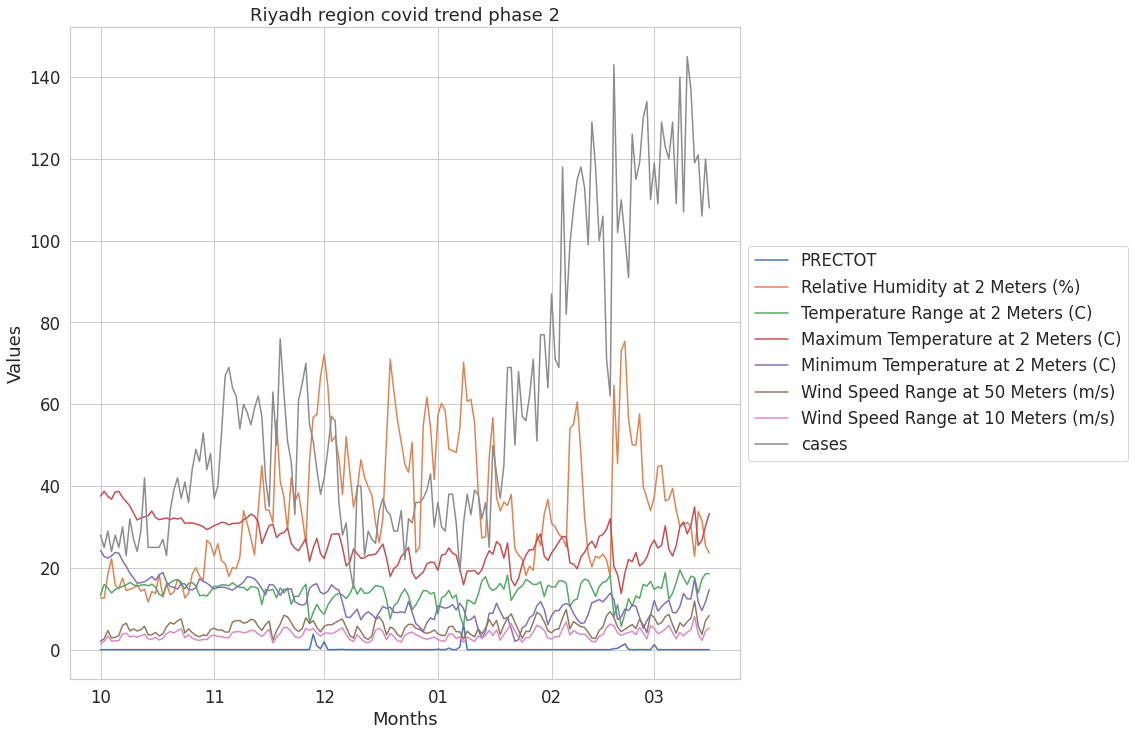

In [67]:
fig, ax = line_plot(phase2_riyadh, "Riyadh region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Relative Humidity at 2 Meters (%)'>

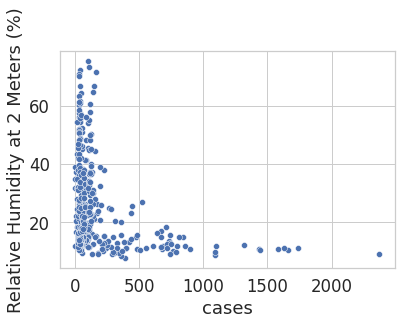

In [68]:
scatter_plot(df_riyadh, "cases", riyadh_columns["RH2M"])

<AxesSubplot:xlabel='cases', ylabel='Temperature Range at 2 Meters (C)'>

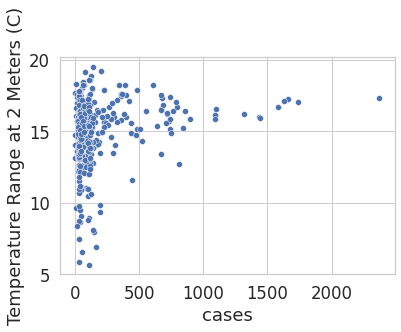

In [69]:
scatter_plot(df_riyadh, "cases", riyadh_columns["T2M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

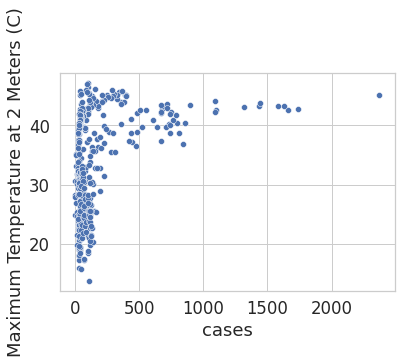

In [70]:
scatter_plot(df_riyadh, "cases", riyadh_columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

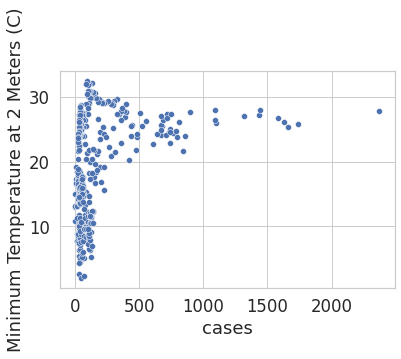

In [71]:
scatter_plot(df_riyadh, "cases", riyadh_columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

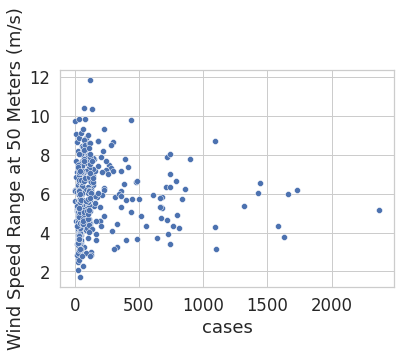

In [72]:
scatter_plot(df_riyadh, "cases", riyadh_columns["WS50M"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

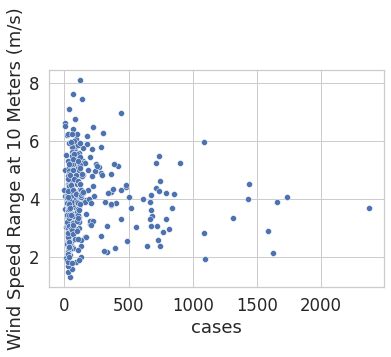

In [73]:
scatter_plot(df_riyadh, "cases", riyadh_columns["WS10M"])

## Converting region dataframes into excel files

In [ ]:
df_southern_mean.to_excel("Southern_weather_cases.xlsx") 
df_northern_mean.to_excel("northern_weather_cases.xlsx") 
df_eastern_mean.to_excel("eastern_weather_cases.xlsx") 
df_western_mean.to_excel("western_weather_cases.xlsx")
df_riyadh.to_excel("Riyadh_weather_cases.xlsx") 